## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

### 1. 建立价格和长度的字典

In [1]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]

In [2]:
from collections import defaultdict

In [3]:
price = defaultdict(int)
for i, p in enumerate(original_price): 
    price[i + 1] = p

### 2. 何为装饰器

In [4]:
from functools import wraps

In [5]:
called_time_with_arg = defaultdict(int)

def get_call_time(f):
    """@param f is a function"""
    @wraps(f)
    def wrap(n):
        """Haha I am warp"""
        print('I can count')
        result = f(n)
        called_time_with_arg[(f.__name__, n)] += 1
        return result
    return wrap

In [6]:
@get_call_time
def add_twenty(n): 
    return n + 20

In [7]:
add_twenty(10)

I can count


30

In [8]:
called_time_with_arg

defaultdict(int, {('add_twenty', 10): 1})

### 3. 使用装饰器来完成DP中的查表操作

In [11]:
solution = {}
memo.already_computed = {}

In [10]:
def memo(f): 
    memo.already_computed = {}
    @wraps(f)
    def _wrap(arg):
        result = None
        
        if arg in memo.already_computed: 
            result = memo.already_computed[arg]
        else:
            result = f(arg)
            memo.already_computed[arg] = result
        
        return result
    
    return _wrap

In [14]:
@memo
def r(n):
    """
    Args: n is the iron length
    Return: the max revenue 
    """
    max_price, max_split = max(
        [(price[n], 0)] + [(r(i) + r(n-i), i) for i in range(1, n)], key=lambda x: x[0]
    )

    solution[n] = (n - max_split, max_split)
    
    return max_price

In [15]:
r(15)

45

In [16]:
solution

{1: (1, 0),
 2: (2, 0),
 3: (3, 0),
 4: (2, 2),
 5: (3, 2),
 6: (6, 0),
 7: (6, 1),
 8: (6, 2),
 9: (6, 3),
 10: (10, 0),
 11: (11, 0),
 12: (11, 1),
 13: (11, 2),
 14: (11, 3),
 15: (13, 2)}

### 4. 解析字典solution来获取最终切割结果

In [17]:
def parse_solution(n):
    left_split, right_split = solution[n]
    
    if right_split == 0: return [left_split]
    
    return parse_solution(left_split) + parse_solution(right_split)

In [18]:
parse_solution(15)

[11, 2, 2]

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

<font color=DeepPink size=3>该部分作业已经在Assignment-02中完成。</font>

### Part 3: Finish the Solution Parse Part of Edit-Distance

### 1. 计算编辑距离

In [19]:
from functools import lru_cache

In [37]:
global solution
solution = {}

In [38]:
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation 
    
    return min_distance

In [23]:
edit_distance('ABCCEFRT', 'FACDEG')

6

In [32]:
edit_distance('beijing', 'biejin')

3

In [39]:
edit_distance('1010', '11100')

2

### 2. 给出编辑距离问题的解析结果

In [40]:
import re
from collections import OrderedDict
parse_result = OrderedDict()

In [41]:
def parse_solution(string1, string2):
    operation = solution[(string1, string2)]
    parse_result[(string1, string2)] = operation
    
    if 'DEL' in operation:
        string1 = re.sub(operation[-1], '', string1[::-1], 1)[::-1]
    elif 'ADD' in operation:
        string1 = string1 + operation[-1]
    elif 'SUB' in operation:
        string1 = re.sub(operation[-6], operation[-1], string1[::-1], 1)[::-1]

    while (string1[-1] == string2[-1]):
        string1 = string1[:-1]
        string2 = string2[:-1]
        if (string1 == '') or (string2 == ''): break
            
    if (string1 == string2): return parse_result
    elif string2 == '': 
        parse_result[(string1, string2)] = 'DEL ' + string1
        return parse_result
    elif string1 == '': 
        parse_result[(string1, string2)] = 'ADD ' + string2
        return parse_result
    else: parse_solution(string1, string2)

In [28]:
parse_solution('ABCCEFRT', 'FACDEG')

In [29]:
parse_result

OrderedDict([(('ABCCEFRT', 'FACDEG'), 'DEL T'),
             (('ABCCEFR', 'FACDEG'), 'DEL R'),
             (('ABCCEF', 'FACDEG'), 'SUB F => G'),
             (('ABCC', 'FACD'), 'SUB C => D'),
             (('AB', 'FA'), 'DEL B'),
             (('', 'F'), 'ADD F')])

In [35]:
parse_solution('beijing', 'biejin')

In [36]:
parse_result

OrderedDict([(('beijing', 'biejin'), 'DEL g'),
             (('bei', 'bie'), 'DEL i'),
             (('b', 'bi'), 'ADD i')])

In [42]:
parse_solution('1010', '11100')

In [43]:
parse_result

OrderedDict([(('1010', '11100'), 'ADD 0'), (('10', '11'), 'SUB 0 => 1')])

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ <font color=DeepPink>Deep Learning</font>
+ 黑客与画家
+ 数学之美
+ <font color=DeepPink>Fluent Python</font>
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans: &ensp;&ensp;<font color=DeepPink>因为梯度可以反映函数值的变化方向，梯度为正，函数值增大；梯度为负，函数值减小。所以可以用梯度反方向来代替监督方法中的四个方向，让参数自动沿着梯度下降的方向更新，这样可以保证每次都沿着正确的方向更新，速度更快，所以我们选择用梯度来拟合目标函数。</font>

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:&ensp;&ensp;<font color=DeepPink>梯度相当于一元函数中的导数，即多元函数中的偏导数。</font>

&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;<font color=DeepPink>下降指的是参数的更新沿着梯度下降的方向，从而可以使目标函数值不断的减小。</font>


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:&ensp;&ensp;<font color=DeepPink>梯度下降法相比前两种方法在选择参数的更新方向上没有随机因素，每次参数的更新都沿着正确的方向，所以其求解速度更快，结果也更优。</font>

4. Using the simple words to describe: What's the machine leanring.¶

Ans:&ensp;&ensp;<font color=DeepPink>机器利用数据自动生成函数来达到某种目标或解决某种问题的方法。</font>

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

&ensp;&ensp;<font color=DeepPink>A：因为动态规划可以加速递归编程计算的速度，前提是递归计算的子递归计算中包含重叠解；</font>

&ensp;&ensp;<font color=DeepPink>B：查了一些资料，感觉动态规划和搜索的主要不同点在于是否有最优子结构以及有无后效性。结合切钢筋和地铁换乘问题就可以很好理解，切钢筋每个阶段的最优状态可以从之前某个阶段的某个或某些状态直接得到，而地铁换乘每个阶段的最优状态是由之前所有阶段的状态的组合得到的，所以切钢筋（动态规划）有最优子结构且无后效性，而地铁换乘（搜索）无最优子结构且有后效性。</font>

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

&ensp;&ensp;<font color=DeepPink>A：因为动态规划是一种数学规划的建模思想，可以对各种各样的多阶段决策问题进行建模，从而找出最优或近似解（近似动态规划）；</font>

&ensp;&ensp;<font color=DeepPink>B：机器学习并不是万能的，有些问题其实机器学习并不能很好的解决。其实有很多机器学习算法用的就是动态规划，比如强化学习中的值迭代和策略迭代。综上所述，既然能够结合动态规划很好的解决问题，何必非要费时费力的“拟合函数”那。</font>

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

Ans:&ensp;&ensp;<font color=DeepPink>最长公共子序列、旅行商问题（TSP）、维特比分析</font>

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

Ans:&ensp;&ensp;<font color=DeepPink>拼写检查、论文查重、基因序列分析（二个DNA的类似程度）</font>

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

<font color=DeepPink>最优子结构性质：如果问题的最优解所包含的子问题的解也是最优的，我们就称该问题具有最优子结构性质（即满足最优化原理）；</font>

<font color=DeepPink>无后效性：即子问题的解一旦确定，就不再改变，不受在这之后、包含它的更大的问题的求解决策影响；</font>

<font color=DeepPink>子问题重叠性质：子问题重叠性质是指在用递归算法自顶向下对问题进行求解时，每次产生的子问题并不总是新问题，有些子问题会被重复计算多次。动态规划算法正是利用了这种子问题的重叠性质，对每一个子问题只计算一次，然后将其计算结果保存在一个表格中，当再次需要计算已经计算过的子问题时，只是在表格中简单地查看一下结果，从而获得较高的效率。</font>

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

Ans:&ensp;&ensp;<font color=DeepPink><维数灾难></font>
<font color=DeepPink>
+ 运行时间和状态变量的范围强相关（时间复杂度）；
+ 存储空间和状态变量的范围强相关（空间复杂度）；
+ 需要满足重复子问题和最优子结构；
+ 最优子结构和状态转移方程的定义比较难寻找。</font>

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [1]:
import random
import matplotlib.pylab as plt

In [2]:
%matplotlib notebook

In [3]:
latitudes = [random.randint(-100, 100) for _ in range(10)]
longitude = [random.randint(-100, 100) for _ in range(10)]

<IPython.core.display.Javascript object>


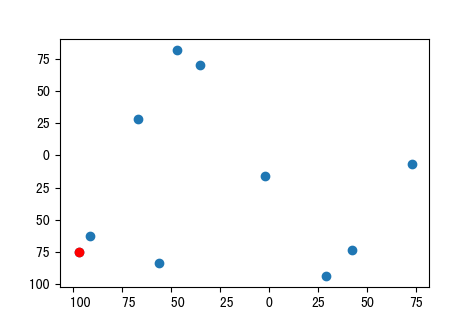

In [4]:
plt.scatter(latitudes, longitude)
plt.scatter(latitudes[0], longitude[0], color = 'r')

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

### <font color=DeepPink>本次作业只做了k=1的情况，如下所示：</font>

In [5]:
location_set = [(i, j) for i, j in zip(latitudes, longitude)]

In [6]:
location_dict = {i: j for i, j in enumerate(location_set)}

In [7]:
index_list = [index for index in location_dict.keys()]

In [8]:
def compute_distance(point_1, point_2):
    return sqrt((point_1[0] - point_2[0]) ** 2 + (point_1[1] - point_2[1]) ** 2)

In [9]:
from functools import wraps

In [10]:
from math import sqrt

In [11]:
solution = []
already_computed_key, already_computed_value = [], []

In [12]:
def memo(f):

    @wraps(f)
    def _wrap(arg1, arg2):
        result = None
        
        if [arg1, arg2] in already_computed_key:
            result = already_computed_value[already_computed_key.index([arg1, arg2])]
        else:
            result = f(arg1, arg2, 0)
            already_computed_key.append([arg1, arg2])
            already_computed_value.append(result)
        
        return result
    
    return _wrap

In [13]:
@memo
def find_shortest(start_point, index_list, final_point = 0):

    if index_list == []: return compute_distance(location_dict[start_point], location_dict[final_point])
    
    set_ = index_list[:]
    if len(set_) == 1:
        return compute_distance(location_dict[start_point], location_dict[set_[0]])+compute_distance(location_dict[set_[0]], location_dict[final_point])
    
    set_.remove(start_point)
    value, point = min([(compute_distance(location_dict[start_point], location_dict[next_point]) + find_shortest(next_point, set_), next_point) for next_point in set_], key=lambda x:x[0])
    
    solution.append([start_point, point, set_])
    return value

In [14]:
parse_solution = []
def parse(index_list, start = 0):
    copy_list = index_list[:]
    copy_list.remove(start)
    
    for list_ in solution:
        if start in list_ and copy_list in list_:
            parse_solution.append([list_[0], list_[1]])
            if len(copy_list) == 1: return parse_solution.append([copy_list[0], 0])
            parse(copy_list, start = list_[1])

In [15]:
find_shortest(0, index_list)

574.9756900005425

In [16]:
already_computed_key

[[9, [9]],
 [8, [8, 9]],
 [8, [8]],
 [9, [8, 9]],
 [7, [7, 8, 9]],
 [7, [7, 9]],
 [7, [7]],
 [9, [7, 9]],
 [8, [7, 8, 9]],
 [7, [7, 8]],
 [8, [7, 8]],
 [9, [7, 8, 9]],
 [6, [6, 7, 8, 9]],
 [6, [6, 8, 9]],
 [6, [6, 9]],
 [6, [6]],
 [9, [6, 9]],
 [8, [6, 8, 9]],
 [6, [6, 8]],
 [8, [6, 8]],
 [9, [6, 8, 9]],
 [7, [6, 7, 8, 9]],
 [6, [6, 7, 9]],
 [7, [6, 7, 9]],
 [6, [6, 7]],
 [7, [6, 7]],
 [9, [6, 7, 9]],
 [8, [6, 7, 8, 9]],
 [6, [6, 7, 8]],
 [7, [6, 7, 8]],
 [8, [6, 7, 8]],
 [9, [6, 7, 8, 9]],
 [5, [5, 6, 7, 8, 9]],
 [5, [5, 7, 8, 9]],
 [5, [5, 8, 9]],
 [5, [5, 9]],
 [5, [5]],
 [9, [5, 9]],
 [8, [5, 8, 9]],
 [5, [5, 8]],
 [8, [5, 8]],
 [9, [5, 8, 9]],
 [7, [5, 7, 8, 9]],
 [5, [5, 7, 9]],
 [7, [5, 7, 9]],
 [5, [5, 7]],
 [7, [5, 7]],
 [9, [5, 7, 9]],
 [8, [5, 7, 8, 9]],
 [5, [5, 7, 8]],
 [7, [5, 7, 8]],
 [8, [5, 7, 8]],
 [9, [5, 7, 8, 9]],
 [6, [5, 6, 7, 8, 9]],
 [5, [5, 6, 8, 9]],
 [6, [5, 6, 8, 9]],
 [5, [5, 6, 9]],
 [6, [5, 6, 9]],
 [5, [5, 6]],
 [6, [5, 6]],
 [9, [5, 6, 9]],
 [8, [5, 6,

In [18]:
solution

[[8, 9, [9]],
 [9, 8, [8]],
 [7, 8, [8, 9]],
 [7, 9, [9]],
 [9, 7, [7]],
 [8, 7, [7, 9]],
 [7, 8, [8]],
 [8, 7, [7]],
 [9, 7, [7, 8]],
 [6, 8, [7, 8, 9]],
 [6, 8, [8, 9]],
 [6, 9, [9]],
 [9, 6, [6]],
 [8, 9, [6, 9]],
 [6, 8, [8]],
 [8, 6, [6]],
 [9, 8, [6, 8]],
 [7, 8, [6, 8, 9]],
 [6, 7, [7, 9]],
 [7, 9, [6, 9]],
 [6, 7, [7]],
 [7, 6, [6]],
 [9, 7, [6, 7]],
 [8, 7, [6, 7, 9]],
 [6, 7, [7, 8]],
 [7, 8, [6, 8]],
 [8, 7, [6, 7]],
 [9, 7, [6, 7, 8]],
 [5, 9, [6, 7, 8, 9]],
 [5, 9, [7, 8, 9]],
 [5, 9, [8, 9]],
 [5, 9, [9]],
 [9, 5, [5]],
 [8, 9, [5, 9]],
 [5, 8, [8]],
 [8, 5, [5]],
 [9, 5, [5, 8]],
 [7, 8, [5, 8, 9]],
 [5, 9, [7, 9]],
 [7, 9, [5, 9]],
 [5, 7, [7]],
 [7, 5, [5]],
 [9, 5, [5, 7]],
 [8, 7, [5, 7, 9]],
 [5, 7, [7, 8]],
 [7, 8, [5, 8]],
 [8, 7, [5, 7]],
 [9, 5, [5, 7, 8]],
 [6, 8, [5, 7, 8, 9]],
 [5, 9, [6, 8, 9]],
 [6, 8, [5, 8, 9]],
 [5, 9, [6, 9]],
 [6, 9, [5, 9]],
 [5, 6, [6]],
 [6, 5, [5]],
 [9, 5, [5, 6]],
 [8, 9, [5, 6, 9]],
 [5, 8, [6, 8]],
 [6, 8, [5, 8]],
 [8, 5, [5, 

In [19]:
parse(index_list, start = 0)

In [20]:
parse_solution

[[0, 1],
 [1, 5],
 [5, 4],
 [4, 9],
 [9, 3],
 [3, 2],
 [2, 7],
 [7, 8],
 [8, 6],
 [6, 0]]

<IPython.core.display.Javascript object>


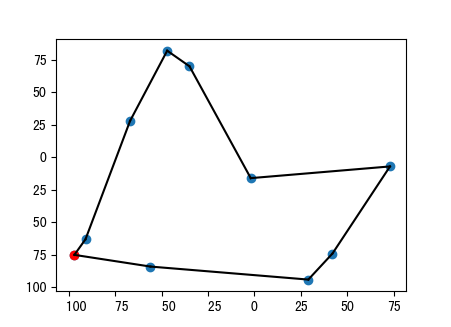

In [21]:
plt.scatter(latitudes, longitude)
plt.scatter(latitudes[0], longitude[0], color = 'r')
for i in parse_solution:
    plt.plot([location_dict[i[0]][0], location_dict[i[1]][0]], [location_dict[i[0]][1], location_dict[i[1]][1]], color = 'k')

### <font color=DeepPink>k>1的情况，还没有什么好的想法 :(</font>

In [14]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [4]:
import matplotlib.pyplot as plt

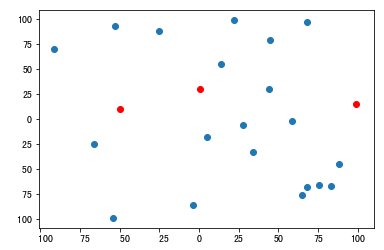

In [15]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

shuro